# This Notebook plots one or more precomputed precision recall curves.

In [1]:
# Import section
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from skimage.filters import gabor_kernel
from scipy import signal as sg
from collections import OrderedDict
import math

In [2]:
pre_defined_recall = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [3]:
# Specifiy onne or more precomputed precision recall sets.
p_r_sets = ['mean_stdev', 'Gabor_2_3', 'Gabor_3_4']
num_curves = len(p_r_sets)

cwd=os.getcwd()

p_r_values = np.zeros((num_curves, len(pre_defined_recall)))
# Read each of the prevision recall sets.
for i in range(num_curves):
    average_precision_filename = cwd+'/precision_recall/' + p_r_sets[i] + '_p_r.txt'
    p_r_values[i] = np.genfromtxt(average_precision_filename, delimiter=',')
    #print(p_r_values[i])

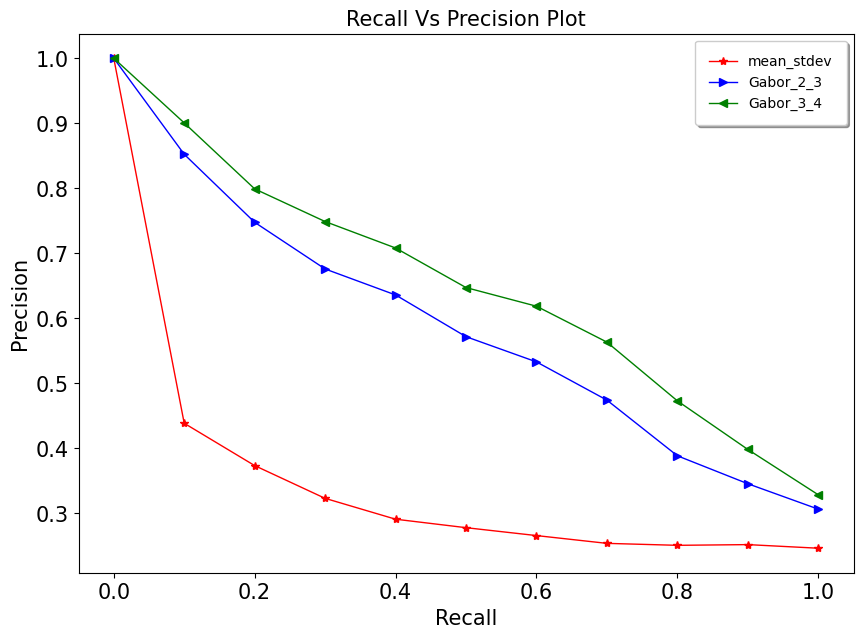

       Average Precision Values       
--------------------------------------
mean_stdev = 0.3610683856099536
--------------------------------------
Gabor_2_3 = 0.5936605266352992
--------------------------------------
Gabor_3_4 = 0.6531704060846645
--------------------------------------


In [4]:
# Plot the precision recall curves.

fig = plt.figure(figsize=(10,7))
x = pre_defined_recall

# Create different plot types. Support up to six plots. Add more if needed.
plot_type = ['*r-', '>b-', '<g-', '*y-', '>-', '<-']

for i in range(num_curves):
    y = p_r_values[i]
    plt.plot(x, y, plot_type[i], linewidth=1, label=p_r_sets[i])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=10)
plt.title("Recall Vs Precision Plot",fontsize=15)
plt.xlabel("Recall",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.savefig(cwd+"/"+"precision vs recall.png")
plt.show()

# Print average precision.
print("       Average Precision Values       ")
for i in range(num_curves):
    print("--------------------------------------")
    print(p_r_sets[i] + ' = ' + str(np.mean(p_r_values[i])))

print("--------------------------------------")
